# Atrributes

Our data-set is with information from 17,379 hours over 731 days with 12 features (information categories) for each hour. The features are:

- Instantcount of total rental bikes
- instant: record index
- Season (1:winter, 2:spring, 3:summer, 4:fall)
- Month (1 to 12)
- Hour (0 to 23)
- Holiday : whether that day is holiday or not
- Weekday : day of the week
- Workday : if day is neither weekend nor holiday , value is 1. Otherwise 0

- Weather situation :
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- temp :  temperature
- Humidity: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

# Import modules

In [1]:
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sns
%pip install seaborn --upgrade seaborn
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Loading the dataset

In [2]:
df = pd.read_csv('Operations-Dem-Planning_-BikeShare.csv')
df.head()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,1,16,1,1,0,0,6,0,1,37,0.81,0.0
1,2,40,1,1,1,0,6,0,1,36,0.80,0.0
2,3,32,1,1,2,0,6,0,1,36,0.80,0.0
3,4,13,1,1,3,0,6,0,1,37,0.75,0.0
4,5,1,1,1,4,0,6,0,1,37,0.75,0.0


In [3]:
# statistical info
df.describe()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,189.463088,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,59.719719,0.627229,0.190098
std,5017.0295,181.387599,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,20.406317,0.192930,0.122340
min,1.0000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,4345.5000,40.000000,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,43.000000,0.480000,0.104500
50%,8690.0000,142.000000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,61.000000,0.630000,0.194000
75%,13034.5000,281.000000,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,77.000000,0.780000,0.253700
max,17379.0000,977.000000,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,122.000000,1.000000,0.850700


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Instant      17379 non-null  int64  
 1   Riders       17379 non-null  int64  
 2   Season       17379 non-null  int64  
 3   Month        17379 non-null  int64  
 4   Hour         17379 non-null  int64  
 5   Holiday      17379 non-null  int64  
 6   Weekday      17379 non-null  int64  
 7   Workday      17379 non-null  int64  
 8   Weather      17379 non-null  int64  
 9   Temperature  17379 non-null  int64  
 10  Humidity     17379 non-null  float64
 11  Wind         17379 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 1.6 MB


In [5]:
# unique values
df.apply(lambda x: len(x.unique()))

Instant        17379
Riders           869
Season             4
Month             12
Hour              24
Holiday            2
Weekday            7
Workday            2
Weather            4
Temperature       65
Humidity          89
Wind              30
dtype: int64

In [6]:
# check for null values
df.isnull().sum()

Instant        0
Riders         0
Season         0
Month          0
Hour           0
Holiday        0
Weekday        0
Workday        0
Weather        0
Temperature    0
Humidity       0
Wind           0
dtype: int64

In [7]:
df = df.drop(columns=['Instant'])

In [8]:
# change int columns to category
cols = ['Season','Month','Hour','Holiday','Weekday','Workday','Weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Riders       17379 non-null  int64   
 1   Season       17379 non-null  category
 2   Month        17379 non-null  category
 3   Hour         17379 non-null  category
 4   Holiday      17379 non-null  category
 5   Weekday      17379 non-null  category
 6   Workday      17379 non-null  category
 7   Weather      17379 non-null  category
 8   Temperature  17379 non-null  int64   
 9   Humidity     17379 non-null  float64 
 10  Wind         17379 non-null  float64 
dtypes: category(7), float64(2), int64(2)
memory usage: 664.2 KB


# Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

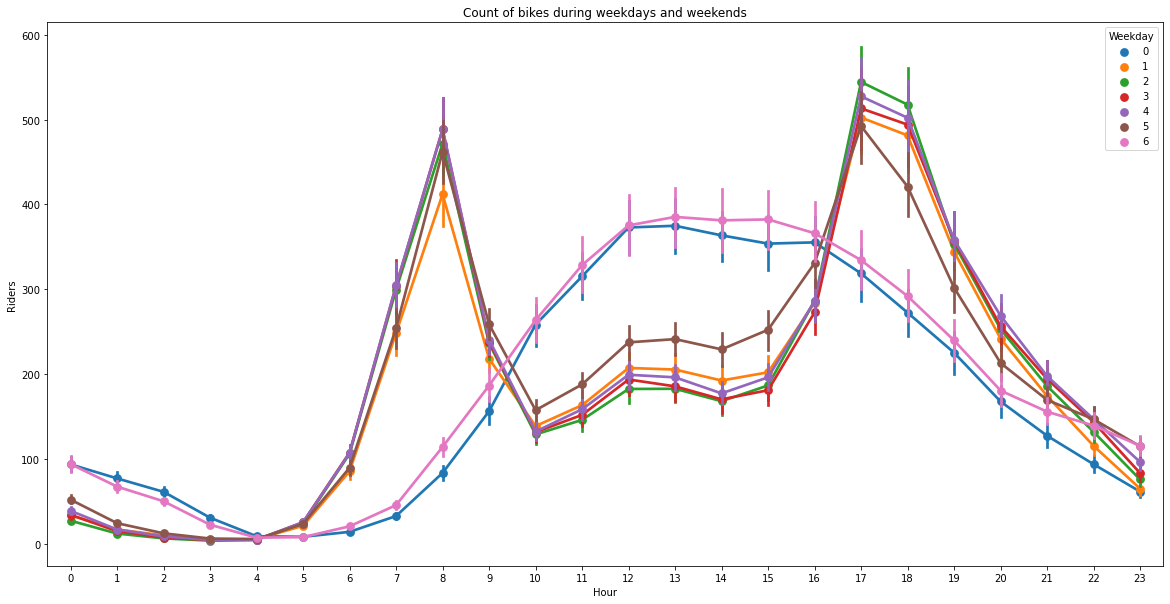

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Hour', y='Riders', hue='Weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during different weather')]

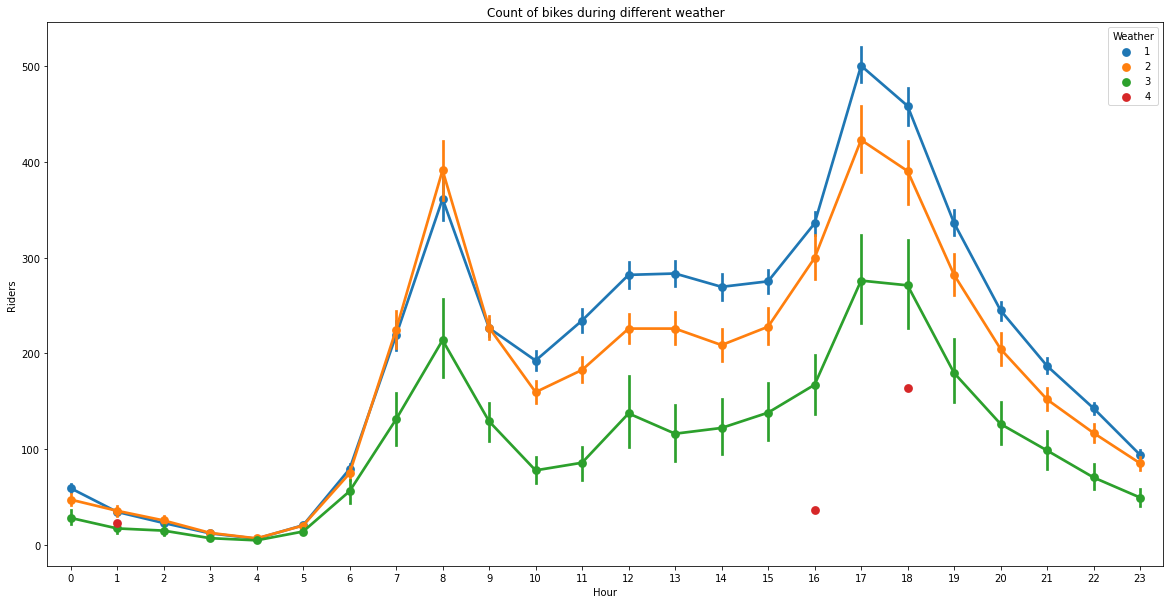

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Hour', y='Riders', hue='Weather', ax=ax)
ax.set(title='Count of bikes during different weather')

[Text(0.5, 1.0, 'Count of bikes during different Seasons')]

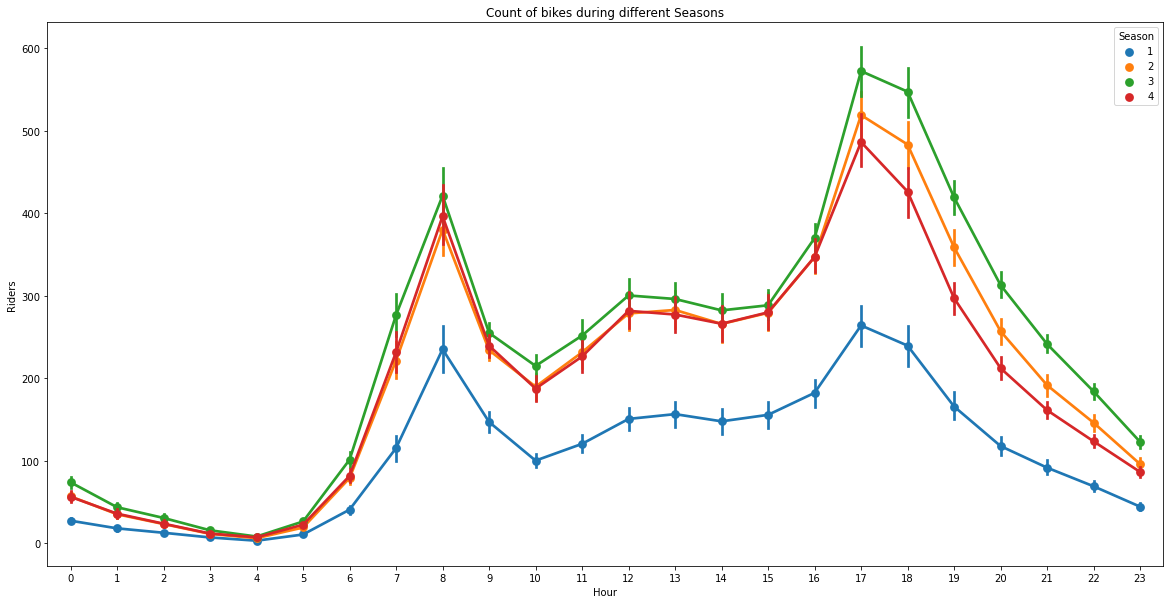

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Hour', y='Riders', hue='Season', ax=ax)
ax.set(title='Count of bikes during different Seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

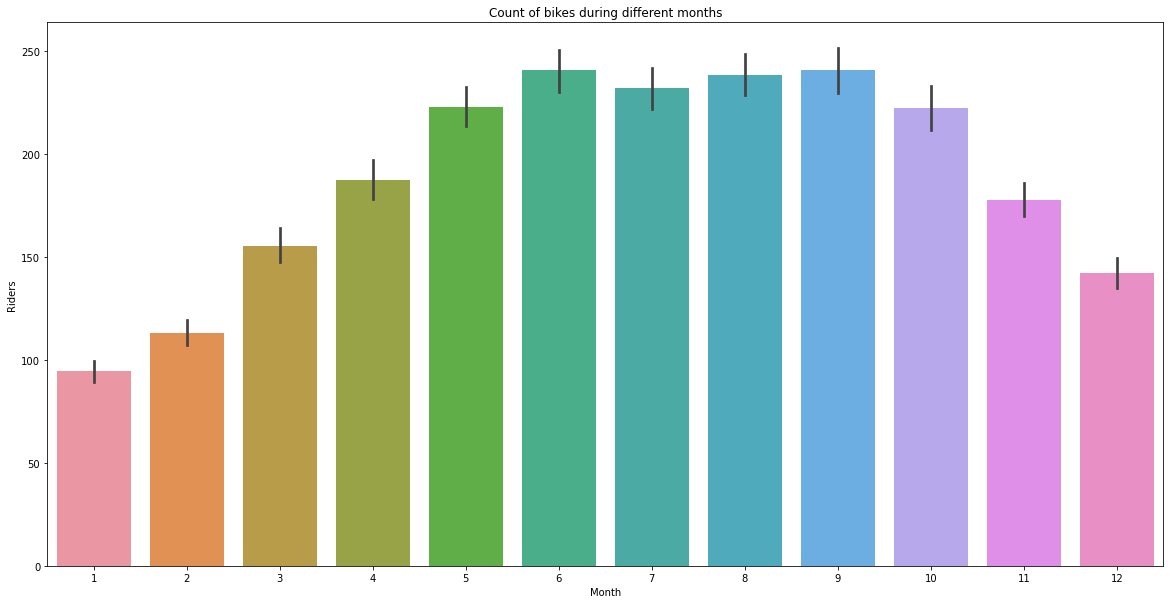

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='Month', y='Riders', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

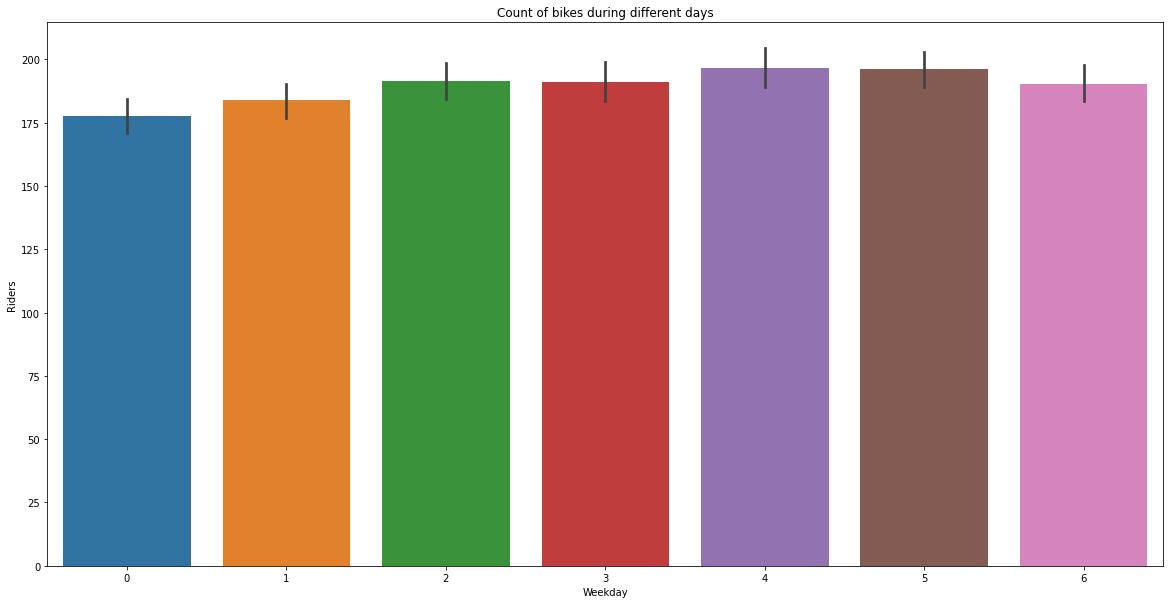

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='Weekday', y='Riders', ax=ax)
ax.set(title='Count of bikes during different days')

In [14]:
df['Riders'] = np.log(df['Riders'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

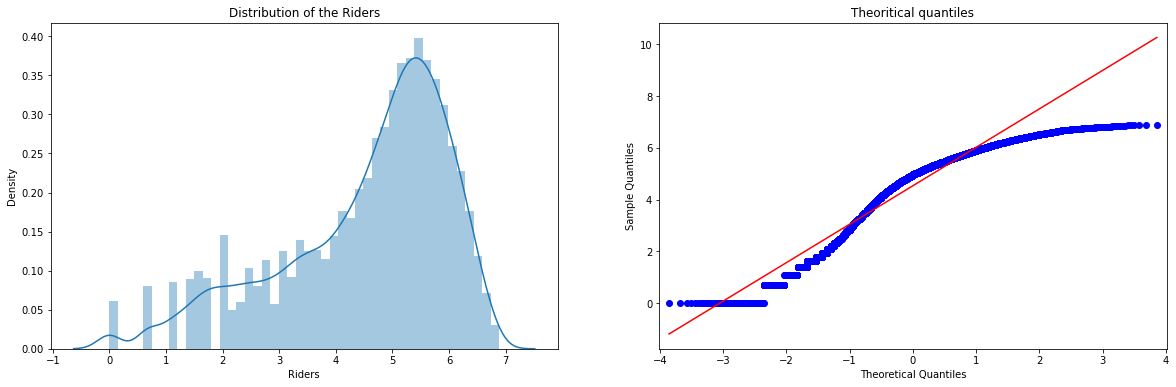

In [15]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['Riders'], ax=ax1)
ax1.set(title='Distribution of the Riders')
qqplot(df['Riders'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

[Text(0.5, 1.0, 'Relation between humidity and Riders')]

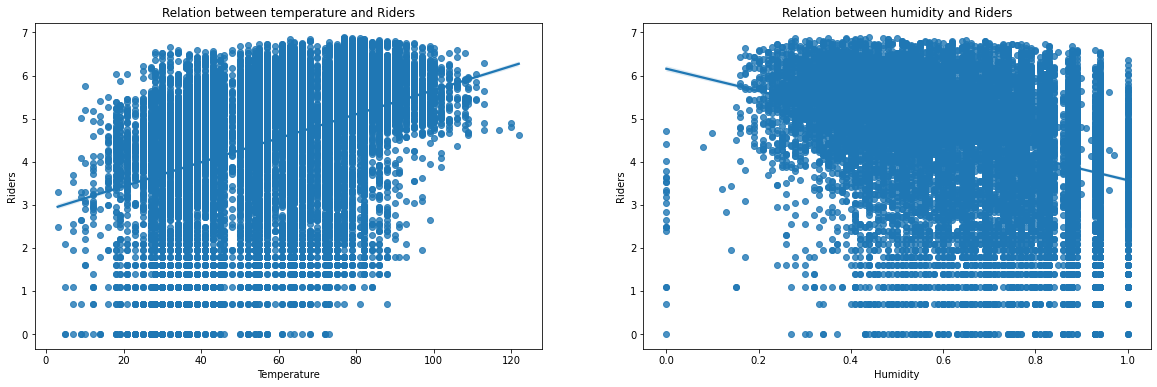

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['Temperature'], y=df['Riders'], ax=ax1)
ax1.set(title="Relation between temperature and Riders")
sns.regplot(x=df['Humidity'], y=df['Riders'], ax=ax2)
ax2.set(title="Relation between humidity and Riders")

# Correlation Matrix

<AxesSubplot:>

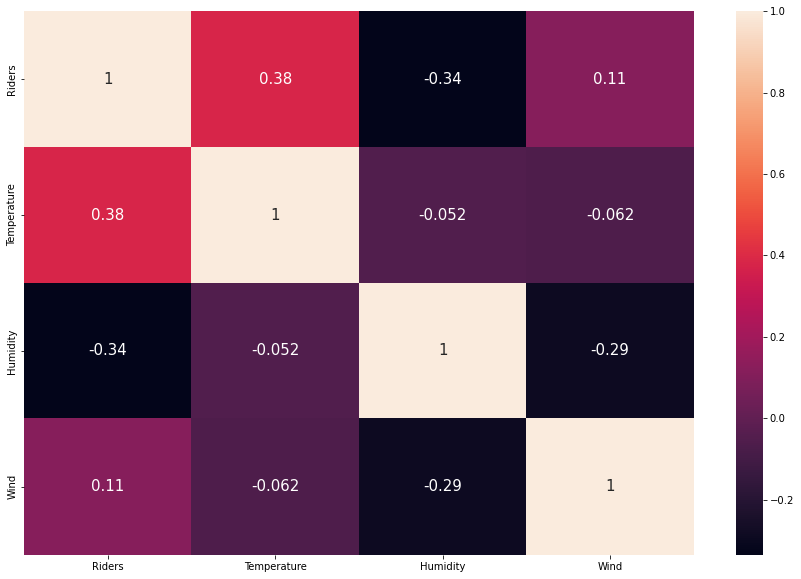

In [17]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

# One hot encoding 
creates new (binary) columns, indicating the presence of each possible value from the original data. 

Categorical features (Month, Week-number, Hour, Weather-situation, Season, Weekday) into multiple binary sub-features where each sub-feature indicates whether a certain category for the original feature is True or Not (1 or 0). If possible to do so without making the data-set “fat”, it is best to split each multi-classification feature up into multiple binary features. Since we have a massive data-set with 17,000+ data points, we can expand these features and still have a “skinny” data-set so that we don’t risk over-fitting. Note that this does significantly increase the dimensionality of our data-set and increases our computational time by a factor of greater than 5X. Since we are using only non-complex regression algorithms in this project, we can afford to add computational complexity for better accuracy in our predictions.

In [18]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['Season','Month','Hour','Holiday','Weekday','Workday','Weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,Riders,Temperature,Humidity,Wind,Season_2,Season_3,Season_4,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Workday_1,Weather_2,Weather_3,Weather_4
0,2.772589,37,0.81,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.688879,36,0.80,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3.465736,36,0.80,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2.564949,37,0.75,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.000000,37,0.75,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Input Split 

Drop columns Windspeed, Riders

In [19]:
X = df_oh.drop(columns=['Wind','Riders'], axis=1)
y = df_oh['Riders']

In [20]:
# Model Training

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.svm import SVR

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [22]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

# Cross Validation Score

Cross Validation is a very useful technique for assessing the effectiveness of your model, particularly in cases where you need to mitigate overfitting. It is also of use in determining the hyper parameters of your model, in the sense that which parameters will result in lowest test error.

<font color=green> RandomForest has the least cross validation score, therefore the best model.</font>

In [23]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.4478542130578732
Model: Ridge()
CV score: 0.4477746442129168
Model: HuberRegressor()
CV score: 0.48256822423894363
Model: ElasticNetCV()
CV score: 0.6926953389279362
Model: DecisionTreeRegressor()
CV score: 0.45318985017467456
Model: RandomForestRegressor()
CV score: 0.23583139058731878
Model: ExtraTreesRegressor()
CV score: 0.23402926699771415
Model: GradientBoostingRegressor()
CV score: 0.3559186949673522


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

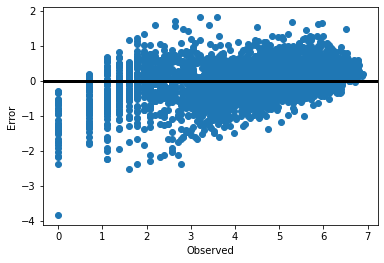

In [26]:
# plot the error difference
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

# Calculating Root Mean Square

In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.4881215422698355

In [28]:
models=[RandomForestRegressor(),LinearRegression(),DecisionTreeRegressor(),ExtraTreesRegressor(),GradientBoostingRegressor()]
model_names=['RandomForestRegressor','LinearRegression','DecisionTreeRegressor','ExtraTreesRegressor','GradientBoostingRegressor']
rmse=[]
r_squared=[]
dic={}
for model in range (len(models)):
    alg=models[model]
    alg.fit(x_train,y_train)
    alg_y_pred=alg.predict(x_test)
    rmse.append(np.sqrt(mean_squared_error(y_test,alg_y_pred)))
    r_squared.append(r2_score(y_test,alg_y_pred))
dic={'Modelling Algorithms':model_names,'RMSE':rmse,'R-Squared':r_squared}   
model_performances= pd.DataFrame(dic)

model_performances

,Modelling Algorithms,RMSE,R-Squared
0,RandomForestRegressor,0.487339,0.890828
1,LinearRegression,0.671317,0.792842
2,DecisionTreeRegressor,0.655515,0.802480
3,ExtraTreesRegressor,0.490337,0.889481
4,GradientBoostingRegressor,0.601198,0.833857


Text(0.5, 1.0, 'Algorithms vs RMSE')

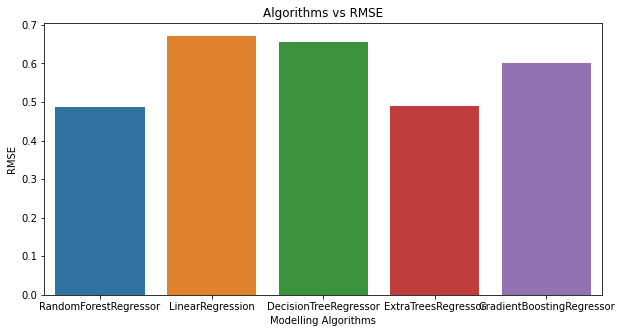

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(x='Modelling Algorithms',y='RMSE',data=model_performances)
plt.title("Algorithms vs RMSE")

Text(0.5, 1.0, 'Algorithms vs R-Squared')

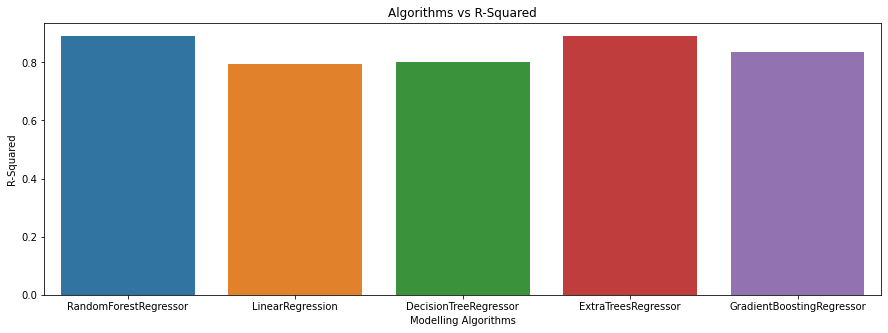

In [30]:
plt.figure(figsize = (15,5))
sns.barplot(x='Modelling Algorithms',y='R-Squared',data=model_performances)
plt.title("Algorithms vs R-Squared")

 ### Random Forest Regressor fits good compared to other models taken into consideration. Will fine tune Random Forest Regressor using randomized search.